In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Sinal sem defeito

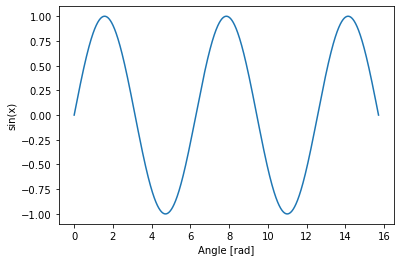

In [12]:
x = np.linspace(0, np.pi*5, 2000)
#seno = np.sin(x) + np.random.randn(1) + np.random.normal(0,1,2000)/20
seno = np.sin(x)
#noise = np.random.normal(0,1,100)
ang = x
plt.plot(x,seno)
#plt.plot(x, np.sin(x))
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

## Sinal com interrupção

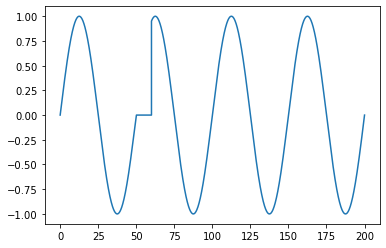

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

surge_point = 50
surge_recovery=60
amplitudeAfterSurge = 0
T = 50
x_normal1 = np.linspace(0, surge_point, 1000)
x_surge = np.linspace(surge_point, surge_recovery, 1000)
x_normal2 = np.linspace(surge_recovery, 200, 1000)

y_normal1 = [math.sin(2*math.pi*i/T) for i in x_normal1]
y_surge = [amplitudeAfterSurge * math.sin(2*math.pi*i/T) for i in x_surge] 
y_normal2 = [math.sin(2*math.pi*i/T) for i in x_normal2]

axix_X = np.concatenate((y_normal1,y_surge,y_normal2))
axix_y = np.concatenate((x_normal1,x_surge,x_normal2))

#dados = np.array([axix_X], [axix_y])
combined = np.vstack((axix_X, axix_y)).T

plt.plot(axix_y,axix_X)

plt.show()

In [14]:

# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
data = asarray([[]])
# save to csv file
savetxt('data.csv', data, delimiter=',')

In [15]:
np.savetxt('struct_array.csv', combined, delimiter=' ', header='eixoX,eixoY', comments='')

## Sinal com elevação

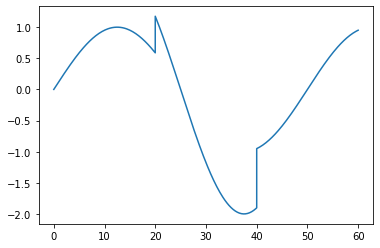

In [16]:
#Plotando a elevação
import math

start = 0
surge_point = 20
recover = 40
end = 60
amplitudeAfterSurge = 2
T = 50
x_normal1 = np.linspace(start, surge_point, 100)
x_surge = np.linspace(surge_point, recover, 100)
x_normal2 = np.linspace(recover, end, 100)

y_normal1 = [math.sin(2*math.pi*i/T) for i in x_normal1] # first part of the function
y_surge = [amplitudeAfterSurge * math.sin(2*math.pi*i/T) for i in x_surge] 
y_normal2 = [math.sin(2*math.pi*i/T) for i in x_normal2]

axix_X = np.concatenate((y_normal1,y_surge,y_normal2))
axix_y = np.concatenate((x_normal1,x_surge,x_normal2))

combined = np.vstack((axix_X, axix_y)).T
np.savetxt('elev.csv', combined, delimiter=',', header='eixoX,eixoY', comments='')

y,x = pd.read_csv('elev.csv')
plt.plot(axix_y,axix_X)
plt.show()

## Sinal com ruído

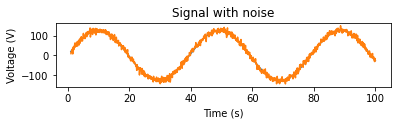

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 1000)
x_volts = 127*np.sin(t/(2*np.pi))
plt.subplot(3,1,1)
plt.plot(t, x_volts)

x_watts = x_volts ** 2

# Adding noise using target SNR

# Set a target SNR
target_snr_db = 20
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
y_volts = x_volts + noise_volts

# Plot signal with noise
#plt.subplot(2,1,1)
plt.plot(t, y_volts)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

combined = np.vstack((t, y_volts)).T
np.savetxt('ruido_INST.csv', combined, delimiter=',', header='Amostra,Tensão', comments='')

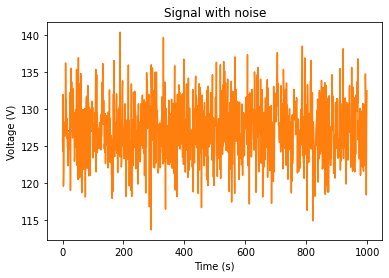

In [18]:
# Refazendo o código do sinal com ruído mas com valores RMS:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 1000)
x_volts = 127*t/t
#x_volts = x_volts*127
#plt.subplot(3,1,1)
plt.plot(t, x_volts)

x_watts = x_volts ** 2

# Adding noise using target SNR

# Set a target SNR
target_snr_db = 30
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
y_volts = x_volts + noise_volts

# Plot signal with noise
#plt.subplot(2,1,1)
#plt.plot(t, y_volts)
plt.plot(y_volts)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

combined = np.vstack((t, y_volts)).T
np.savetxt('ruido_RMS.csv', combined, delimiter=',', header='Amostra,Tensão', comments='')

### Aqui eu estava tentando adicionar uma coluna de 'dia' e outra de 'hora' por código. Depois que deu errado eu criei no excel só para testar o código do PRODIST. Vou corrigir este só se precisar dele novamente.

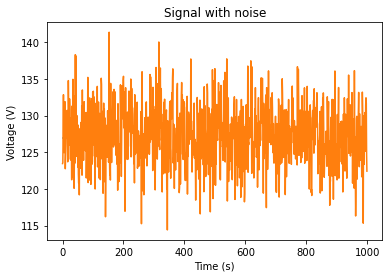

In [19]:
# Refazendo o código acima e adicionando as colunas de data e hora
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 1000)
x_volts = 127*t/t
#x_volts = x_volts*127
#plt.subplot(3,1,1)
plt.plot(t, x_volts)

x_watts = x_volts ** 2

# Adding noise using target SNR

# Set a target SNR
target_snr_db = 30
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
y_volts = x_volts + noise_volts

# Plot signal with noise
#plt.subplot(2,1,1)
#plt.plot(t, y_volts)
plt.plot(y_volts)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

combined = np.vstack((t, y_volts)).T
np.savetxt('ruido_RMS.csv', combined, delimiter=',', header='Amostra,Tensão', comments='')

In [20]:
import pandas as pd
#df = pd.date_range(start='1/1/2021', periods=10, freq='10min')
#df



#df2.date = pd.to_datetime(df2.date, format='%Y-%d-%m')
df = pd.bdate_range(start='1/1/2021', end='1/5/2021', freq='10min',name='data')

#df1 = df.dt.strftime('%m/%d/%Y')

#df.date = pd.to_datetime(df.date, format='%d-%m-%Y')
#df
#=pd.to_datetime(df['date'], infer_datetime_format='%Y-%m-%d %H:%M:%S')

#df['date_only'] = df.iloc[:,1]
df['date_only'] = df['date_time_column'].dt.date

df[:]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
import pandas as pd
#times = pd.date_range('2012-10-01', periods=1008, freq='10min')
#times

#df = times = pd.date_range('2012-10-01', periods=1008, freq='10min')
#df['Dates'] = pd.to_datetime(df['date']).dt.date
#df['Time'] = pd.to_datetime(df['date']).dt.time

data = pd.date_range('30-12-2021', periods=1008, freq='10min')

#df = pd.to_datetime(df).date
#print(df)

#df = pd.to_datetime(df).normalize()
#print(df)

datas = []
for d in data:
    datas = d.append()

datas

In [ ]:
import numpy as np
np.savetxt('ruido_RMS.csv', data, combined, delimiter=',', header='data,Tensão', comments='')